# Wrangle and Analyse Data - WeRateDogs


## Table of Contents

- [Introduction](#intro)
- [Part I - Gathering data](#gathering)
- [Part II - Assessing Data](#assessing)
- [Part III - Cleaning Data](#cleaning)
- [Part IV - Storing, Analysing, and Visualizing Data](#analyse)


<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. Udacity assigned a project based on understand the results of an A/B test run by an e-commerce website. Scenario is a company has developed a new web page in order to try and increase the number of users.

Goal is to find that the new wevsite is performing well or not as compared to the old one. I performed different steps with the data set 
in order to acheive our aim. Steps involved were removing duplicate user ids , page assignment , hypothesis testing and standard statistical tests and multiple regression modelling.


<a id='probability'></a>
### Part I - Gathering Data

To get started, let's import our libraries.

In [1]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import tweepy 
import json
import os
import re
%matplotlib inline

 We read in the `twitter-archive-enhanced.csv` data. Store it in `df`. 


In [2]:
# Load the Twitter archive CSV file into a dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv')

Download tweet image predictions using the Requests library and write it to `image_predictions.tsv`

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

We read in the `image-predictions.tsv` data. Store it in `df`. 


In [4]:
prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [5]:
# Declare Twitter API keys and access tokens
consumer_key = 'cJ9X75NKF8gEv0Ysctx2onr3R'
consumer_secret = 'rb1YB2yigLMTIzBSQHWUQubE9yx75Urrdyn58OdogOzcEnKZTv'
access_token = '1160731284823400450-oef0SpvSZeaKB27vQfn67dEFjp1pMq'
access_secret = 'chCMqpdluGr7Rx9HTDNkWSO0CmVsaVEtX5M3dsonbcNxJ'

In [6]:
# OAuth Authentication using tweepy.OAuthHandler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [7]:
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

#### Help Resource : https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

In [8]:
# tweet IDs in the Twitter archive to filter out data for each tweet

with open('getstatus_error.txt', 'w') as errfile: 
    valid_ids = 0
    err_ids = 0
    tweet_ids = archive.tweet_id
    with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
        for i, tweet_id in tweet_ids.iteritems():
            try:
                print("%s# %s" % (str(i+1), tweet_id))
                
                # Get tweet data using Twitter API
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json_content = tweet._json
                
                # Write each tweet's JSON data to its own line in a file
                json.dump(json_content, outfile)
                outfile.write('\n')
                valid_ids += 1
            except tweepy.TweepError as e:
                err_ids += 1
                err_str = []
                err_str.append(str(tweet_id))
                err_str.append(': ')
                err_str.append(e.response.json()['errors'][0]['message'])
                err_str.append('\n')
                errfile.write(''.join(err_str))
                print(''.join(err_str))
                continue
        print("%s %s" % ('Valid tweets:', valid_ids))
        print("%s %s" % ('Error tweets:', err_ids))
        

1# 892420643555336193
2# 892177421306343426
3# 891815181378084864
4# 891689557279858688
5# 891327558926688256
6# 891087950875897856
7# 890971913173991426
8# 890729181411237888
9# 890609185150312448
10# 890240255349198849
11# 890006608113172480
12# 889880896479866881
13# 889665388333682689
14# 889638837579907072
15# 889531135344209921
16# 889278841981685760
17# 888917238123831296
18# 888804989199671297
19# 888554962724278272
20# 888202515573088257
888202515573088257: No status found with that ID.

21# 888078434458587136
22# 887705289381826560
23# 887517139158093824
24# 887473957103951883
25# 887343217045368832
26# 887101392804085760
27# 886983233522544640
28# 886736880519319552
29# 886680336477933568
30# 886366144734445568
31# 886267009285017600
32# 886258384151887873
33# 886054160059072513
34# 885984800019947520
35# 885528943205470208
36# 885518971528720385
37# 885311592912609280
38# 885167619883638784
39# 884925521741709313
40# 884876753390489601
41# 884562892145688576
42# 88444180538

Rate limit reached. Sleeping for: 352


287# 838831947270979586
288# 838561493054533637
289# 838476387338051585
290# 838201503651401729
291# 838150277551247360
292# 838085839343206401
293# 838083903487373313
294# 837820167694528512
295# 837482249356513284
296# 837471256429613056
297# 837366284874571778
837366284874571778: No status found with that ID.

298# 837110210464448512
299# 837012587749474308
837012587749474308: No status found with that ID.

300# 836989968035819520
301# 836753516572119041
302# 836677758902222849
303# 836648853927522308
304# 836397794269200385
305# 836380477523124226
306# 836260088725786625
307# 836001077879255040
308# 835685285446955009
309# 835574547218894849
310# 835536468978302976
311# 835309094223372289
312# 835297930240217089
313# 835264098648616962
314# 835246439529840640
315# 835172783151792128
316# 835152434251116546
317# 834931633769889797
318# 834786237630337024
319# 834574053763584002
320# 834477809192075265
321# 834458053273591808
322# 834209720923721728
323# 834167344700198914
324# 83408

616# 796563435802726400
617# 796484825502875648
618# 796387464403357696
619# 796177847564038144
620# 796149749086875649
621# 796125600683540480
622# 796116448414461957
623# 796080075804475393
624# 796031486298386433
625# 795464331001561088
626# 795400264262053889
627# 795076730285391872
628# 794983741416415232
629# 794926597468000259
630# 794355576146903043
631# 794332329137291264
632# 794205286408003585
633# 793962221541933056
634# 793845145112371200
635# 793614319594401792
636# 793601777308463104
637# 793500921481273345
638# 793286476301799424
639# 793271401113350145
640# 793256262322548741
641# 793241302385262592
642# 793226087023144960
643# 793210959003287553
644# 793195938047070209
645# 793180763617361921
646# 793165685325201412
647# 793150605191548928
648# 793135492858580992
649# 793120401413079041
650# 792913359805018113
651# 792883833364439040
652# 792773781206999040
653# 792394556390137856
654# 792050063153438720
655# 791821351946420224
656# 791784077045166082
657# 79178092787

949# 752334515931054080
950# 752309394570878976
951# 752173152931807232
952# 751950017322246144
953# 751937170840121344
954# 751830394383790080
955# 751793661361422336
956# 751598357617971201
957# 751583847268179968
958# 751538714308972544
959# 751456908746354688
960# 751251247299190784
961# 751205363882532864
962# 751132876104687617
963# 750868782890057730
964# 750719632563142656
965# 750506206503038976
966# 750429297815552001
967# 750383411068534784
968# 750381685133418496
969# 750147208377409536
970# 750132105863102464
971# 750117059602808832
972# 750101899009982464
973# 750086836815486976
974# 750071704093859840
975# 750056684286914561
976# 750041628174217216
977# 750026558547456000
978# 750011400160841729
979# 749996283729883136
980# 749981277374128128
981# 749774190421639168
982# 749417653287129088
983# 749403093750648834
984# 749395845976588288
985# 749317047558017024
986# 749075273010798592
987# 749064354620928000
988# 749036806121881602
989# 748977405889503236
990# 74893263767

Rate limit reached. Sleeping for: 390


1187# 718540630683709445
1188# 718460005985447936
1189# 718454725339934721
1190# 718246886998687744
1191# 718234618122661888
1192# 717841801130979328
1193# 717790033953034240
1194# 717537687239008257
1195# 717428917016076293
1196# 717421804990701568
1197# 717047459982213120
1198# 717009362452090881
1199# 716802964044845056
1200# 716791146589110272
1201# 716730379797970944
1202# 716447146686459905
1203# 716439118184652801
1204# 716285507865542656
1205# 716080869887381504
1206# 715928423106027520
1207# 715758151270801409
1208# 715733265223708672
1209# 715704790270025728
1210# 715696743237730304
1211# 715680795826982913
1212# 715360349751484417
1213# 715342466308784130
1214# 715220193576927233
1215# 715200624753819648
1216# 715009755312439296
1217# 714982300363173890
1218# 714962719905021952
1219# 714957620017307648
1220# 714631576617938945
1221# 714606013974974464
1222# 714485234495041536
1223# 714258258790387713
1224# 714251586676113411
1225# 714214115368108032
1226# 714141408463036416


1515# 691090071332753408
1516# 690989312272396288
1517# 690959652130045952
1518# 690938899477221376
1519# 690932576555528194
1520# 690735892932222976
1521# 690728923253055490
1522# 690690673629138944
1523# 690649993829576704
1524# 690607260360429569
1525# 690597161306841088
1526# 690400367696297985
1527# 690374419777196032
1528# 690360449368465409
1529# 690348396616552449
1530# 690248561355657216
1531# 690021994562220032
1532# 690015576308211712
1533# 690005060500217858
1534# 689999384604450816
1535# 689993469801164801
1536# 689977555533848577
1537# 689905486972461056
1538# 689877686181715968
1539# 689835978131935233
1540# 689661964914655233
1541# 689659372465688576
1542# 689623661272240129
1543# 689599056876867584
1544# 689557536375177216
1545# 689517482558820352
1546# 689289219123089408
1547# 689283819090870273
1548# 689280876073582592
1549# 689275259254616065
1550# 689255633275777024
1551# 689154315265683456
1552# 689143371370250240
1553# 688916208532455424
1554# 688908934925697024


1841# 675888385639251968
1842# 675878199931371520
1843# 675870721063669760
1844# 675853064436391936
1845# 675849018447167488
1846# 675845657354215424
1847# 675822767435051008
1848# 675820929667219457
1849# 675798442703122432
1850# 675781562965868544
1851# 675740360753160193
1852# 675710890956750848
1853# 675707330206547968
1854# 675706639471788032
1855# 675534494439489536
1856# 675531475945709568
1857# 675522403582218240
1858# 675517828909424640
1859# 675501075957489664
1860# 675497103322386432
1861# 675489971617296384
1862# 675483430902214656
1863# 675432746517426176
1864# 675372240448454658
1865# 675362609739206656
1866# 675354435921575936
1867# 675349384339542016
1868# 675334060156301312
1869# 675166823650848770
1870# 675153376133427200
1871# 675149409102012420
1872# 675147105808306176
1873# 675146535592706048
1874# 675145476954566656
1875# 675135153782571009
1876# 675113801096802304
1877# 675111688094527488
1878# 675109292475830276
1879# 675047298674663426
1880# 675015141583413248


Rate limit reached. Sleeping for: 379


2087# 670803562457407488
2088# 670797304698376195
2089# 670792680469889025
2090# 670789397210615808
2091# 670786190031921152
2092# 670783437142401025
2093# 670782429121134593
2094# 670780561024270336
2095# 670778058496974848
2096# 670764103623966721
2097# 670755717859713024
2098# 670733412878163972
2099# 670727704916926465
2100# 670717338665226240
2101# 670704688707301377
2102# 670691627984359425
2103# 670679630144274432
2104# 670676092097810432
2105# 670668383499735048
2106# 670474236058800128
2107# 670468609693655041
2108# 670465786746662913
2109# 670452855871037440
2110# 670449342516494336
2111# 670444955656130560
2112# 670442337873600512
2113# 670435821946826752
2114# 670434127938719744
2115# 670433248821026816
2116# 670428280563085312
2117# 670427002554466305
2118# 670421925039075328
2119# 670420569653809152
2120# 670417414769758208
2121# 670411370698022913
2122# 670408998013820928
2123# 670403879788544000
2124# 670385711116361728
2125# 670374371102445568
2126# 670361874861563904


In [9]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
tweet_data = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        
        # Append to list of dictionaries
        tweet_data.append({'tweet_id': data['id'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count'],
                        'display_text_range': data['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
tweet_json = pd.DataFrame(tweet_data, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

#### Part II - Assessing Data

In [10]:
# Checking structure and info about the data
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


###### Twitter archive columns:

- **tweet_id** : unique id for each tweet


- **in_reply_to_status_id** : if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID


- **in_reply_to_user_id** : if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID


- **timestamp** : time when this Tweet was created


- **source** : utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client


- **text** : actual UTF-8 text of the status update


- **retweeted_status_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID


- **retweeted_status_user_id** : if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID


- **retweeted_status_timestamp** : time of retweet


- **expanded_urls** : tweet URL


- **rating_numerator** : numerator of the rating of a dog. 


- **rating_denominator** : denominator of the rating of a dog. Should always be 10


- **name** : name of the dog


- **doggo** : dog life "stage"


- **floofer** : dog life "stage"


- **pupper** : dog life "stage"


- **puppo** : dog life "stage"

In [12]:
pd.set_option('display.max_colwidth', -1)
archive['text']

0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                         
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV    
2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                     
3       This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                               
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f    
5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tu

Checking for correct ratings in `text` (Tweet Data)

In [13]:
archive.loc[archive['text'].str.contains(r"(\d+\.\d*\/\d+)")].text

c:\users\nilad\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


45      This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                         
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                     
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                 
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1689    I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace                                                       
1712    Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD                                    

Finding duplicate values in `tweet id` 

In [14]:
sum(archive['tweet_id'].duplicated())

0

Finding retweets in `archive` in `retweet_status_id`

In [15]:
len(archive[archive['retweeted_status_id'].isnull() == False])

181

Finding missing `tweet_id` which is present in `archive` but not in `prediction` (images)

In [16]:
len(archive[~archive['tweet_id'].isin(prediction['tweet_id'])])

281

Sorting by `rating_numerator` values

In [17]:
archive['rating_numerator'].value_counts().sort_index()

0       2  
1       9  
2       9  
3       19 
4       17 
5       37 
6       32 
7       55 
8       102
9       158
10      461
11      464
12      558
13      351
14      54 
15      2  
17      1  
20      1  
24      1  
26      1  
27      1  
44      1  
45      1  
50      1  
60      1  
75      2  
80      1  
84      1  
88      1  
99      1  
121     1  
143     1  
144     1  
165     1  
182     1  
204     1  
420     2  
666     1  
960     1  
1776    1  
Name: rating_numerator, dtype: int64

In [18]:
print(archive.loc[archive['rating_numerator'] == 0, 'text'])
print(archive.loc[archive['rating_numerator'] == 121, 'text']) 
print(archive.loc[archive['rating_numerator'] == 143, 'text']) 
print(archive.loc[archive['rating_numerator'] == 144, 'text'])
print(archive.loc[archive['rating_numerator'] == 165, 'text'])
print(archive.loc[archive['rating_numerator'] == 182, 'text'])  
print(archive.loc[archive['rating_numerator'] == 204,'text']) 
print(archive.loc[archive['rating_numerator'] == 420, 'text'])
print(archive.loc[archive['rating_numerator'] == 666, 'text'])
print(archive.loc[archive['rating_numerator'] == 960, 'text'])
print(archive.loc[archive['rating_numerator'] == 1776, 'text'])

315     When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag      
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object
1635    Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Name: text, dtype: object
902    Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Name: text, dtype: object
290    @markhoppus 182/10
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https:/

In [19]:
# Analysing the text in corresponding columns to apprehend the rating
print(archive['text'][315])
print(archive['text'][1016])
print(archive['text'][1635])
print(archive['text'][1634])
print(archive['text'][1779])
print(archive['text'][902])
print(archive['text'][290])
print(archive['text'][1120])
print(archive['text'][188])
print(archive['text'][2074])
print(archive['text'][189])
print(archive['text'][313])
print(archive['text'][979])

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
@markhoppus 182/10
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
@s8n You tried very hard to portray th

Sorting by `rating_denominator` values

In [20]:
archive['rating_denominator'].value_counts().sort_index()

0      1   
2      1   
7      1   
10     2333
11     3   
15     1   
16     1   
20     2   
40     1   
50     3   
70     1   
80     2   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
Name: rating_denominator, dtype: int64

In [21]:
# We saw a pattern in rating while anlysing the text that in cases denominator is grater than 10  it may multiple of 10 (no of dogs * 10)
# we need to rectify the denominator value which is less than 10 or is not a multiple of 10.
print(archive.loc[archive['rating_denominator'] == 0, 'text'])
print(archive.loc[archive['rating_denominator'] == 2, 'text']) 
print(archive.loc[archive['rating_denominator'] == 7, 'text']) 
print(archive.loc[archive['rating_denominator'] == 11, 'text']) 
print(archive.loc[archive['rating_denominator'] == 15, 'text'])
print(archive.loc[archive['rating_denominator'] == 16, 'text'])

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Name: text, dtype: object
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1662    This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5 
Name: text, dtype: object
342    @docmisterio a

In [22]:
# Analysing the text in corresponding columns to apprehend the rating
print(archive['text'][313])
print(archive['text'][2335])
print(archive['text'][516])
print(archive['text'][784])
print(archive['text'][1068])
print(archive['text'][1662])
print(archive['text'][342])
print(archive['text'][1663])

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
@docmisterio account started on 11/15/15
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irrespo

Checking the value counts for dog name in `name`

In [23]:
archive['name'].value_counts().sort_index()

Abby            2 
Ace             1 
Acro            1 
Adele           1 
Aiden           1 
Aja             1 
Akumi           1 
Al              1 
Albert          2 
Albus           2 
Aldrick         1 
Alejandro       1 
Alexander       1 
Alexanderson    1 
Alf             1 
Alfie           5 
Alfy            1 
Alice           2 
Amber           1 
Ambrose         1 
Amy             1 
Amélie          1 
Anakin          2 
Andru           1 
Andy            1 
Angel           1 
Anna            1 
Anthony         1 
Antony          1 
Apollo          1 
               .. 
Ziva            1 
Zoe             1 
Zoey            3 
Zooey           1 
Zuzu            1 
a               55
actually        2 
all             1 
an              7 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            4 
life            1 
light           1 
mad             2 
my              1 
not             2 
officially      1 
old         

In [24]:
# Checking structure and info about the data
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [25]:
prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


###### Image Prediction columns:

- **tweet_id** : unique tweet id
- **jpg_url** : dog's image URL
- **img_num** : the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four -images)
- **p1** : algorithm's #1 prediction for the image in the tweet
- **p1_conf** : confidence the algorithm is in its #1 prediction
- **p1_dog** : whether or not the #1 prediction is a breed of dog
- **p2** : algorithm's #2 prediction for the image in the tweet
- **p2_conf** : confidence the algorithm is in its #2 prediction
- **p2_dog** : whether or not the #2 prediction is a breed of dog
- **p3** : algorithm's #3 prediction for the image in the tweet
- **p3_conf** : confidence the algorithm is in its #3 prediction
- **p3_dog** : whether or not the #3 prediction is a breed of dog

Calculating total duplicates in `tweet_id`

In [26]:
sum(prediction['tweet_id'].duplicated())

0

Calculating total duplicates `jpg_url`

In [27]:
sum(prediction['jpg_url'].duplicated())

66

Calculating total count for each values in `img_num`

In [28]:
prediction['img_num'].value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

Calculating different algorithm's prediction counts : `p1` , `p2` , `p3`

In [29]:
print(prediction['p1_dog'].value_counts())
print(prediction['p2_dog'].value_counts())
print(prediction['p3_dog'].value_counts())

True     1532
False    543 
Name: p1_dog, dtype: int64
True     1553
False    522 
Name: p2_dog, dtype: int64
True     1499
False    576 
Name: p3_dog, dtype: int64


In [30]:
# Checking structure and info about the data
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
tweet_id              2333 non-null int64
retweet_count         2333 non-null int64
favorite_count        2333 non-null int64
display_text_range    2333 non-null object
dtypes: int64(3), object(1)
memory usage: 63.8+ KB


In [31]:
tweet_json

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,7978,37223,"[0, 85]"
1,892177421306343426,5922,32020,"[0, 138]"
2,891815181378084864,3912,24117,"[0, 121]"
3,891689557279858688,8115,40544,"[0, 79]"
4,891327558926688256,8809,38781,"[0, 138]"
5,891087950875897856,2926,19485,"[0, 138]"
6,890971913173991426,1943,11373,"[0, 140]"
7,890729181411237888,17757,62813,"[0, 118]"
8,890609185150312448,4029,26803,"[0, 122]"
9,890240255349198849,6940,30707,"[0, 133]"


###### Tweet_json columns :

- **tweet_id** : unique tweet id
- **retweet_count** : number of times tweer has been retweeted
- **favorite_count** : number of times tweet has been liked
- **display_text_range** : an array of two unicode code point indices, identifying the inclusive start and exclusive end of the displayable content of the Tweet

Checking for total duplicates `id`

In [32]:
sum(tweet_json['tweet_id'].duplicated())

0

#### Issues:

##### Tidiness Issues (3) :

- Merging the three dataframes into one using tweet_id.

- Joining the dog stages into a single column instead of four dirrent columns. doggo, floofer, pupper and puppo columns in `archive` should be merged into one column named "stage"

- If we remove duplicates from `archive` (i.e. retweets) we will have empty retweeted_status_id, retweeted_status_user_id and       retweeted_status_timestamp columns, therefor we must drop them for tidiness also there are many other useless columns in the table.



##### Quality Issues:
- Tweet_id, timestamp, sources, img_num and dog_stages need to be converted into the right datatype
- Sources column has to be filtered out to get the useful data. < href > should be removed.
- Removing the values in `name` which are not names.
- Missing values in the dog stages column showing up as 'None'
- Separate timestamp into day - month - year (3 separate columns) for making it simple and efficient.
- Removing the retweets. In text field we can easiely find that by first two letters "RT".
- In the text, we can notice some decimal numbers for the ratings numerator part wrongly extracted
- Some numerator values were higher than 10, must be rectified if not removed


### Part III - Cleaning Data

In [33]:
# Creating a copy of original data cleaned

archive_clean = archive.copy()
prediction_clean = prediction.copy()
tweet_json_clean = tweet_json.copy()

### Tidiness Issues (3) :

#### 1.Merging the three dataframes into one using `tweet_id`

In [34]:
# Join archive_clean with tweet_json_clean on tweet_id
merge = pd.merge(archive_clean, tweet_json_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

# Join merge with prediction_clean
data_clean = pd.merge(merge, prediction_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

In [35]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 31 columns):
tweet_id                      2061 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2061 non-null object
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
doggo                         2061 non-null object
floofer                       2061 non-null object
pupper                        2061 non-null object
puppo                         2061 non-null object
retweet_count                 2061 

In [36]:
data_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.07650

In [37]:
# copy dataframe
archive_master = data_clean

#### 2.Combine dog stages into single column `stage`

In [38]:
# Create and merge dog stages into one column
archive_master['dog_stages'] = archive_master['text'].str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [39]:
archive_master.head(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,P

#### 3.Removing useless columns in `archive_master`

In [40]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 32 columns):
tweet_id                      2061 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2061 non-null object
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
doggo                         2061 non-null object
floofer                       2061 non-null object
pupper                        2061 non-null object
puppo                         2061 non-null object
retweet_count                 2061 

In [42]:
# Delete the columns I won't be using as they shouldn't be useful in the analysis.
archive_master.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','doggo','floofer','pupper','puppo','p1_conf','p1_dog', 'p2_conf','p2_dog', 'p3_conf','p3_dog'], axis=1, inplace=True)

In [43]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 17 columns):
tweet_id              2061 non-null int64
timestamp             2061 non-null object
source                2061 non-null object
text                  2061 non-null object
expanded_urls         2061 non-null object
rating_numerator      2061 non-null int64
rating_denominator    2061 non-null int64
name                  2061 non-null object
retweet_count         2061 non-null int64
favorite_count        2061 non-null int64
display_text_range    2061 non-null object
jpg_url               2061 non-null object
img_num               2061 non-null int64
p1                    2061 non-null object
p2                    2061 non-null object
p3                    2061 non-null object
dog_stages            335 non-null object
dtypes: int64(6), object(11)
memory usage: 201.3+ KB


### Quality Issues (8) :

In [44]:
archive_master.head(100)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,display_text_range,jpg_url,img_num,p1,p2,p3,dog_stages
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,7978,37223,"[0, 85]",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,bagel,banana,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,5922,32020,"[0, 138]",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,Pekinese,papillon,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,3912,24117,"[0, 121]",https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,malamute,kelpie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,8115,40544,"[0, 79]",https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,Labrador_retriever,spatula,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,8809,38781,"[0, 138]",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,English_springer,German_short-haired_pointer,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,2926,19485,"[0, 138]",https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,1943,11373,"[0, 140]",https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,Border_collie,ice_lolly,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,17

#### 1.Converting columns to the correct data type

In [45]:
archive_master['tweet_id'] = archive_master['tweet_id'].astype(str)
archive_master['timestamp'] = pd.to_datetime(archive_master['timestamp'])
archive_master['source'] = archive_master['source'].astype('category')
archive_master['img_num'] = archive_master['img_num'].astype('category')
archive_master['dog_stages'] = archive_master['dog_stages'].astype('category')
archive_master['rating_numerator'] = archive_master['rating_numerator'].astype(float)
archive_master['rating_denominator'] = archive_master['rating_denominator'].astype(float)

In [46]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 17 columns):
tweet_id              2061 non-null object
timestamp             2061 non-null datetime64[ns]
source                2061 non-null category
text                  2061 non-null object
expanded_urls         2061 non-null object
rating_numerator      2061 non-null float64
rating_denominator    2061 non-null float64
name                  2061 non-null object
retweet_count         2061 non-null int64
favorite_count        2061 non-null int64
display_text_range    2061 non-null object
jpg_url               2061 non-null object
img_num               2061 non-null category
p1                    2061 non-null object
p2                    2061 non-null object
p3                    2061 non-null object
dog_stages            335 non-null category
dtypes: category(3), datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 175.4+ KB


#### 2.Removing < href tags >

In [47]:
href_tags = re.compile(r'<[^>]+>')

def remove_tags(text):
    return href_tags.sub('', text)

archive_master['source'] = archive_master['source'].apply(remove_tags)

In [48]:
archive_master.head(100)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,display_text_range,jpg_url,img_num,p1,p2,p3,dog_stages
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,7978,37223,"[0, 85]",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,bagel,banana,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,5922,32020,"[0, 138]",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,Pekinese,papillon,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,3912,24117,"[0, 121]",https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,malamute,kelpie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8115,40544,"[0, 79]",https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,Labrador_retriever,spatula,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,8809,38781,"[0, 138]",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,English_springer,German_short-haired_pointer,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,2926,19485,"[0, 138]",https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant,NaN
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,1943,11373,"[0, 140]",https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,Border_collie,ice_lolly,NaN
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,None,17757,62813,"[0, 118]",https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,Eskimo_dog,Pembroke,NaN
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,4029,26803,"[0, 122]",https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever,NaN
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPh

In [49]:
archive_master['source'].value_counts()

Twitter for iPhone    2021
Twitter Web Client    30  
TweetDeck             10  
Name: source, dtype: int64

#### 3.Replacing the undesirable values in `name` by None

In [50]:
unwantednames = ['None', 'a', 'the', 'an', 'this', 'such', 'quite', 'not', 'one', 'incredibly', 'mad', 'very', 'just', 'my']

for word in unwantednames:
    archive_master.loc[archive_master['name']  == word , 'name'] = None

In [51]:
archive_master.head(200)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,display_text_range,jpg_url,img_num,p1,p2,p3,dog_stages
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,7978,37223,"[0, 85]",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,bagel,banana,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,5922,32020,"[0, 138]",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,Pekinese,papillon,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,3912,24117,"[0, 121]",https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,malamute,kelpie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8115,40544,"[0, 79]",https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,Labrador_retriever,spatula,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,8809,38781,"[0, 138]",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,English_springer,German_short-haired_pointer,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,2926,19485,"[0, 138]",https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant,NaN
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,1943,11373,"[0, 140]",https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,Border_collie,ice_lolly,NaN
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,None,17757,62813,"[0, 118]",https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,Eskimo_dog,Pembroke,NaN
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,4029,26803,"[0, 122]",https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever,NaN
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPh

#### 4.Replacing blank values by None in `dog_stages`

In [52]:
archive_master['dog_stages'] = archive_master['dog_stages'].astype(object).replace('None', np.nan)

In [53]:
archive_master.head(100)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,display_text_range,jpg_url,img_num,p1,p2,p3,dog_stages
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,7978,37223,"[0, 85]",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,bagel,banana,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,5922,32020,"[0, 138]",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,Pekinese,papillon,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,3912,24117,"[0, 121]",https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,malamute,kelpie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8115,40544,"[0, 79]",https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,Labrador_retriever,spatula,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,8809,38781,"[0, 138]",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,English_springer,German_short-haired_pointer,NaN
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,2926,19485,"[0, 138]",https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant,NaN
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,1943,11373,"[0, 140]",https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,Border_collie,ice_lolly,NaN
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,None,17757,62813,"[0, 118]",https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,Eskimo_dog,Pembroke,NaN
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,4029,26803,"[0, 122]",https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever,NaN
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPh

In [54]:
archive_master['dog_stages'].value_counts()

pupper     231
doggo      73 
puppo      28 
floofer    3  
Name: dog_stages, dtype: int64

#### 5.Separate timestamp into day - month - year (3 columns)
First we convert the timestamp to datetime and then extract year, month and day to new columns named `day`, `month` , `year` . Finally drop timestamp column.

In [55]:
# converting timestamp to datetime
archive_master['timestamp'] = pd.to_datetime(archive_master['timestamp'])

In [56]:
# appending day, month, year values to new columns
archive_master['day'] = archive_master['timestamp'].dt.day
archive_master['month'] = archive_master['timestamp'].dt.month
archive_master['year'] = archive_master['timestamp'].dt.year

In [57]:
# now we drop the unnecessary timestamp column
archive_master = archive_master.drop('timestamp', 1)

In [58]:
archive_master.head(300)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,display_text_range,jpg_url,img_num,p1,p2,p3,dog_stages,day,month,year
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,7978,37223,"[0, 85]",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,bagel,banana,NaN,1,8,2017
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,5922,32020,"[0, 138]",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,Pekinese,papillon,NaN,1,8,2017
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,3912,24117,"[0, 121]",https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,malamute,kelpie,NaN,31,7,2017
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8115,40544,"[0, 79]",https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,Labrador_retriever,spatula,NaN,30,7,2017
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,8809,38781,"[0, 138]",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,English_springer,German_short-haired_pointer,NaN,29,7,2017
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,2926,19485,"[0, 138]",https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant,NaN,29,7,2017
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,1943,11373,"[0, 140]",https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,Border_collie,ice_lolly,NaN,28,7,2017
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,None,17757,62813,"[0, 118]",https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,Eskimo_dog,Pembroke,NaN,28,7,2017
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,4029,26803,"[0, 122]",https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever,NaN,27,7,2017
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/1

#### 6. Removing retweets. 
Tweets starting with "RT" means retweets, so we need to remove the retweet values.

In [59]:
archive_master.loc[archive_master['text'].str.startswith('RT') != False]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,display_text_range,jpg_url,img_num,p1,p2,p3,dog_stages,day,month,year
32,885311592912609280,Twitter for iPhone,RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13.0,10.0,Lilly,17448,0,"[0, 133]",https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,seat_belt,pug,NaN,13,7,2017
67,877611172832227328,Twitter for iPhone,RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14.0,10.0,None,77,0,"[0, 122]",https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1,Irish_setter,golden_retriever,Irish_terrier,pupper,21,6,2017
107,867072653475098625,Twitter for iPhone,RT @rachaeleasler: these @dog_rates hats are 13/10 bean approved https://t.co/nRCdq4g9gG,"https://twitter.com/rachaeleasler/status/865013420445368320/photo/1,https://twitter.com/rachaeleasler/status/865013420445368320/photo/1,https://twitter.com/rachaeleasler/status/865013420445368320/photo/1,https://twitter.com/rachaeleasler/status/865013420445368320/photo/1",13.0,10.0,None,118,0,"[0, 88]",https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg,1,Blenheim_spaniel,papillon,Pekinese,NaN,23,5,2017
130,860924035999428608,Twitter for iPhone,RT @tallylott: h*ckin adorable promposal. 13/10 @dog_rates https://t.co/6n8hzNihJ9,"https://twitter.com/tallylott/status/860914485250469888/photo/1,https://twitter.com/tallylott/status/860914485250469888/photo/1,https://twitter.com/tallylott/status/860914485250469888/photo/1,https://twitter.com/tallylott/status/860914485250469888/photo/1",13.0,10.0,None,791,0,"[0, 82]",https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg,2,envelope,oscilloscope,paper_towel,NaN,6,5,2017
167,851861385021730816,Twitter for iPhone,RT @eddie_coe98: Thanks @dog_rates completed my laptop. 10/10 would buy again https://t.co/bO0rThDlXI,"https://twitter.com/eddie_coe98/status/848289382176100353/photo/1,https://twitter.com/eddie_coe98/status/848289382176100353/photo/1",10.0,10.0,None,20,0,"[0, 101]",https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,1,pencil_box,purse,pillow,NaN,11,4,2017
182,847971574464610304,Twitter for iPhone,RT @basic_vacek_: I love my new mug easy 13/10 @dog_rates https://t.co/0bYtoL7Wwt,"https://twitter.com/basic_vacek_/status/847971000004354048/photo/1,https://twitter.com/basic_vacek_/status/847971000004354048/photo/1",13.0,10.0,None,436,0,"[0, 81]",https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg,1,coffee_mug,cup,toilet_tissue,NaN,1,4,2017
209,841833993020538882,Twitter for iPhone,RT @dog_rates: This is Ken. His cheeks are magic. 13/10 (IG: ken_shiba) https://t.co/btzf1zTDeQ,"https://twitter.com/dog_rates/status/817423860136083457/video/1,https://twitter.com/dog_rates/status/817423860136083457/video/1",13.0,10.0,Ken,15571,0,"[0, 95]",https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,Samoyed,Eskimo_dog,NaN,15,3,2017
220,839290600511926273,Twitter for iPhone,RT @alexmartindawg: THE DRINK IS DR. PUPPER 10/10 good pun @matt___nelson @GoodDogsGame https://t.co/act3duiqbL,"https://twitter.com/alexmartindawg/status/839289919298224128/photo/1,https://twitter.com/alexmartindawg/status/839289919298224128/photo/1,https://twitter.com/alexmartindawg/status/839289919298224128/photo/1,https://twitter.com/alexmartindawg/status/839289919298224128/photo/1",1

In [60]:
archive_master = archive_master.loc[archive_master['text'].str.startswith('RT') == False]

In [61]:
archive_master

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,display_text_range,jpg_url,img_num,p1,p2,p3,dog_stages,day,month,year
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,7978,37223,"[0, 85]",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,bagel,banana,NaN,1,8,2017
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,5922,32020,"[0, 138]",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,Pekinese,papillon,NaN,1,8,2017
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,3912,24117,"[0, 121]",https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,malamute,kelpie,NaN,31,7,2017
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8115,40544,"[0, 79]",https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,Labrador_retriever,spatula,NaN,30,7,2017
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,8809,38781,"[0, 138]",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,English_springer,German_short-haired_pointer,NaN,29,7,2017
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,2926,19485,"[0, 138]",https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant,NaN,29,7,2017
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,1943,11373,"[0, 140]",https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,Border_collie,ice_lolly,NaN,28,7,2017
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,None,17757,62813,"[0, 118]",https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,Eskimo_dog,Pembroke,NaN,28,7,2017
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,4029,26803,"[0, 122]",https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever,NaN,27,7,2017
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/1

#### 7.Rectify ratings in numerator and denominators.


In [62]:
# Using regex we try to find all occurences where there are more than one #/# in 'text' column
ratings_in_text = archive_master[archive_master.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

ratings_in_text

c:\users\nilad\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


605     "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ                                
814     This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ                   
865     After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ       
956     Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                                   
990     This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                              
1006    Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE   
1128    This is Socks. That water pup w the super legs just spla

In [63]:
for rate in ratings_in_text:
    mask = archive_master['text'] == rate
    archive_master.loc[mask, 'rating_numerator'] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", rate)
    archive_master.loc[mask, 'rating_denominator'] = 10

In [64]:
archive_master[archive_master['text'].isin(ratings_in_text)]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,display_text_range,jpg_url,img_num,p1,p2,p3,dog_stages,day,month,year
605,777684233540206592,Twitter for iPhone,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,11,10.0,None,3081,11704,"[0, 91]",https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,golden_retriever,otterhound,NaN,19,9,2016
814,747600769478692864,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",7,10.0,Bookstore,571,2383,"[0, 104]",https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,1,Chesapeake_Bay_retriever,Weimaraner,Labrador_retriever,NaN,28,6,2016
865,740373189193256964,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10.0,None,13679,35722,"[0, 116]",https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,kuvasz,Labrador_retriever,NaN,8,6,2016
956,722974582966214656,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10.0,None,1596,4192,"[0, 40]",https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,Greater_Swiss_Mountain_dog,Weimaraner,NaN,21,4,2016
990,716439118184652801,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10.0,Bluebert,215,2423,"[0, 117]",https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,malamute,Eskimo_dog,NaN,3,4,2016
1006,714258258790387713,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,8,10.0,Travis,729,3089,"[0, 143]",https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,1,collie,Chesapeake_Bay_retriever,beagle,NaN,28,3,2016
1128,703356393781329922,Twitter for iPhone,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,2,10.0,Socks,395,1954,"[0, 134]",https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,collie,English_springer,NaN,26,2,2016
1218,695064344191721472,Twitter for iPhone,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",https://twitter.com/dog_rates/status/695064344191721472/video/1,13,10.0,None,607,1637,"[0, 138]",https://pbs.twimg.com/ext_tw_video_thumb/695064251149508610/pu/img/0OPED0aUurb9Z16a.jpg,1,seat_belt,sunglasses,ice_lolly,NaN,4,2,2016
1223,694352839993344000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",5,10.0,Oliviér,632,2089,"[0, 147]",https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,2,Australian_terrier,Yorks

In [65]:
# Set correct numerators for specific tweets
archive_master.loc[(archive_master['tweet_id'] == 703356393781329922) & (archive_master['rating_numerator'] == 2) , ['rating_numerator']] = 9.0
archive_master.loc[(archive_master['tweet_id'] == 694352839993344000) & (archive_master['rating_numerator'] == 5) , ['rating_numerator']] = 10.0
archive_master.loc[(archive_master['tweet_id'] == 690400367696297985) & (archive_master['rating_numerator'] == 6) , ['rating_numerator']] = 10.0
archive_master.loc[(archive_master['tweet_id'] == 674737130913071104) & (archive_master['rating_numerator'] == 4) , ['rating_numerator']] = 10.0
archive_master.loc[(archive_master['tweet_id'] == 668537837512433665) & (archive_master['rating_numerator'] == 1) , ['rating_numerator']] = 8.0
archive_master.loc[(archive_master['tweet_id'] == 667544320556335104) & (archive_master['rating_numerator'] == 4) , ['rating_numerator']] = 10.0

In [67]:
archive_master.head(10)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,display_text_range,jpg_url,img_num,p1,p2,p3,dog_stages,day,month,year
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10.0,Phineas,7978,37223,"[0, 85]",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,bagel,banana,NaN,1,8,2017
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10.0,Tilly,5922,32020,"[0, 138]",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,Pekinese,papillon,NaN,1,8,2017
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10.0,Archie,3912,24117,"[0, 121]",https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,malamute,kelpie,NaN,31,7,2017
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10.0,Darla,8115,40544,"[0, 79]",https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,Labrador_retriever,spatula,NaN,30,7,2017
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10.0,Franklin,8809,38781,"[0, 138]",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,English_springer,German_short-haired_pointer,NaN,29,7,2017
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10.0,None,2926,19485,"[0, 138]",https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant,NaN,29,7,2017
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10.0,Jax,1943,11373,"[0, 140]",https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,Border_collie,ice_lolly,NaN,28,7,2017
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10.0,None,17757,62813,"[0, 118]",https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,Eskimo_dog,Pembroke,NaN,28,7,2017
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10.0,Zoey,4029,26803,"[0, 122]",https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever,NaN,27,7,2017
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much 

#### 8.Fix rating numerator that have decimals.

In [68]:
# find tweets with decimals in rating in 'text' column
archive_master[archive_master['text'].str.contains(r"(\d+\.\d*\/\d+)")]

c:\users\nilad\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,display_text_range,jpg_url,img_num,p1,p2,p3,dog_stages,day,month,year
40,883482846933004288,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10.0,Bella,9324,44197,"[0, 112]",https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,Labrador_retriever,kuvasz,NaN,8,7,2017
548,786709082849828864,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10.0,Logan,6443,19089,"[0, 104]",https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,Persian_cat,chow,NaN,13,10,2016
603,778027034220126208,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10.0,Sophie,1703,6835,"[0, 137]",https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,cocker_spaniel,Lhasa,NaN,20,9,2016
1440,680494726643068929,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10.0,None,496,1765,"[0, 106]",https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,Samoyed,Great_Pyrenees,pupper,25,12,2015


In [69]:
# Set correct numerators for specific tweets
archive_master.loc[(archive_master['tweet_id'] == 883482846933004288) & (archive_master['rating_numerator'] == 5), ['rating_numerator']] = 13.5
archive_master.loc[(archive_master['tweet_id'] == 786709082849828864) & (archive_master['rating_numerator'] == 75), ['rating_numerator']] = 9.75
archive_master.loc[(archive_master['tweet_id'] == 778027034220126208) & (archive_master['rating_numerator'] == 27), ['rating_numerator']] = 11.2
archive_master.loc[(archive_master['tweet_id'] == 680494726643068929) & (archive_master['rating_numerator'] == 26), ['rating_numerator']] = 11.26

In [ ]:
archive_master[archive_master['text'].str.contains(r"(\d+\.\d*\/\d+)")]

### Part IV - Storing, Analysing and Visualising Data

#### Storing to csv file `twitter_archive_master.csv`

In [71]:
archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

#### Analysing the data

In [72]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2060
Data columns (total 19 columns):
tweet_id              1986 non-null object
source                1986 non-null category
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null object
rating_denominator    1986 non-null float64
name                  1354 non-null object
retweet_count         1986 non-null int64
favorite_count        1986 non-null int64
display_text_range    1986 non-null object
jpg_url               1986 non-null object
img_num               1986 non-null category
p1                    1986 non-null object
p2                    1986 non-null object
p3                    1986 non-null object
dog_stages            324 non-null object
day                   1986 non-null int64
month                 1986 non-null int64
year                  1986 non-null int64
dtypes: category(2), float64(1), int64(5), object(11)
memory usage: 198.0+ KB

In [73]:
# creating a copy
df = archive_master

##### 1.Most popular breed.

In [74]:
p1_count = df['p1'].value_counts().head(10)
p1_count

golden_retriever      139
Labrador_retriever    93 
Pembroke              88 
Chihuahua             79 
pug                   54 
chow                  41 
Samoyed               39 
Pomeranian            38 
toy_poodle            37 
malamute              29 
Name: p1, dtype: int64

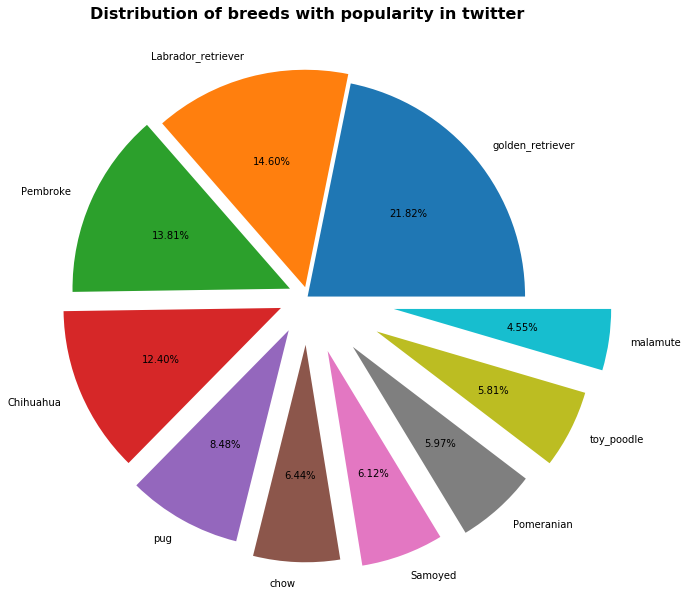

In [75]:
# Shows the repartition of the breeds with a pie chart.
explode = np.linspace(0,0.4,10)
p1_count.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(10,10), explode=explode)
plt.ylabel('')
plt.title('Distribution of breeds with popularity in twitter', weight='bold', fontsize=16)
plt.savefig('breed_distribution.png')

##### 2.Which source is most used when it comes to tweet.

In [76]:
sources_count = df['source'].value_counts()
sources_count

Twitter for iPhone    1948
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64

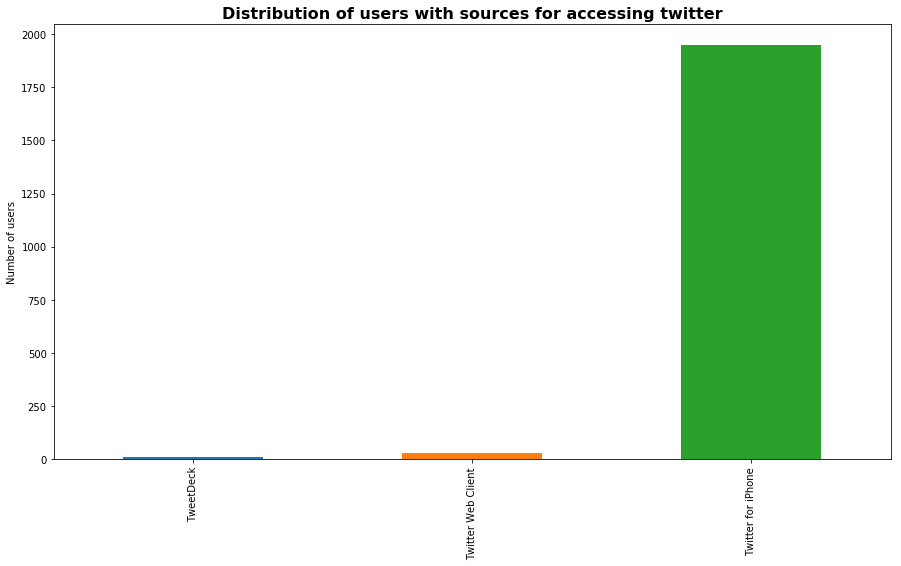

In [77]:
sources_count.sort_values().plot.bar(figsize = (15,8))
plt.ylabel('Sources')
plt.ylabel('Number of users')
plt.title('Distribution of users with sources for accessing twitter', weight='bold', fontsize=16)
plt.savefig('sources.png')

##### 3.What are the most popular names ?

In [78]:
name_count = df['name'].value_counts()
name_count.head(10)

Charlie    10
Cooper     10
Oliver     10
Penny      9 
Tucker     9 
Lucy       9 
Sadie      8 
Winston    8 
Daisy      7 
Lola       7 
Name: name, dtype: int64

##### 4.Which breed is most popular in terms of likes and retweets ?

In [79]:
# most liked dog breed
dog_favorites = df.groupby('p1')['favorite_count'].sum().sort_values(ascending=False).head(10)
dog_favorites

p1
golden_retriever      1622144
Labrador_retriever    1020104
Pembroke              954004 
Chihuahua             661889 
Samoyed               492950 
French_bulldog        448846 
chow                  390173 
pug                   300234 
cocker_spaniel        296303 
Pomeranian            291767 
Name: favorite_count, dtype: int64

In [80]:
dog_retweets = df.groupby('p1')['retweet_count'].sum().sort_values(ascending=False).head(10)
dog_retweets

p1
golden_retriever      461857
Labrador_retriever    323651
Pembroke              256657
Chihuahua             207513
Samoyed               159625
French_bulldog        110711
chow                  108050
Pomeranian            98778 
cocker_spaniel        91173 
Eskimo_dog            89817 
Name: retweet_count, dtype: int64

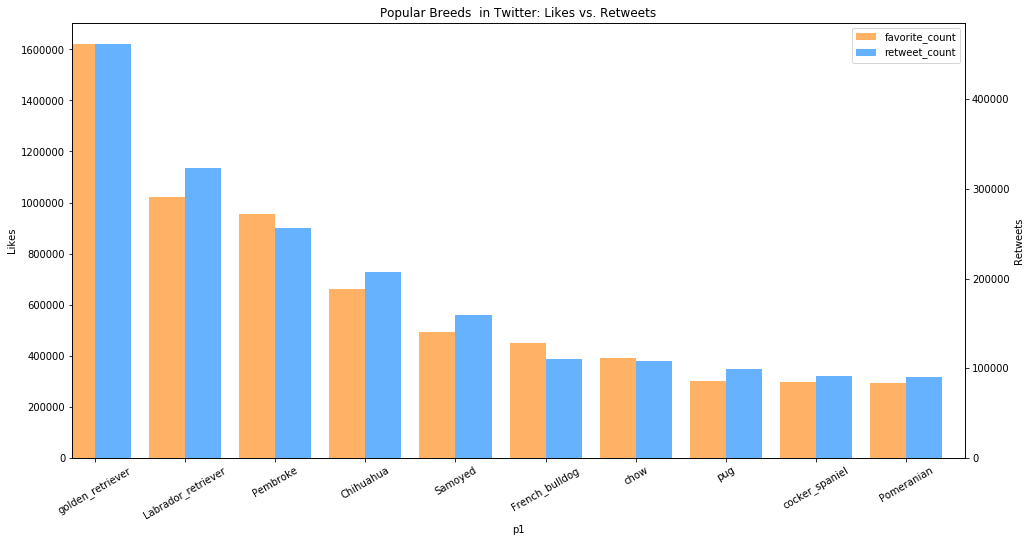

<Figure size 432x288 with 0 Axes>

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax2 = ax.twinx()

width = 0.4

dog_favorites.plot(figsize = (16,8), kind='bar', color='#FFB266', ax=ax, width=width, position=1, title='Popular Breeds  in Twitter: Likes vs. Retweets')
dog_retweets.plot(figsize = (16,8), kind='bar', color='#66B2FF', ax=ax2, width=width, position=0)

ax.grid(False)
ax2.grid(False)

ax.set_ylabel('Likes')
ax2.set_ylabel('Retweets')

ax.set_xticklabels(dog_favorites.index, rotation=30)

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=1)
plt.show()
plt.savefig('popular_breeds.png')

##### 5.Is there any corelation between likes and retweets ?

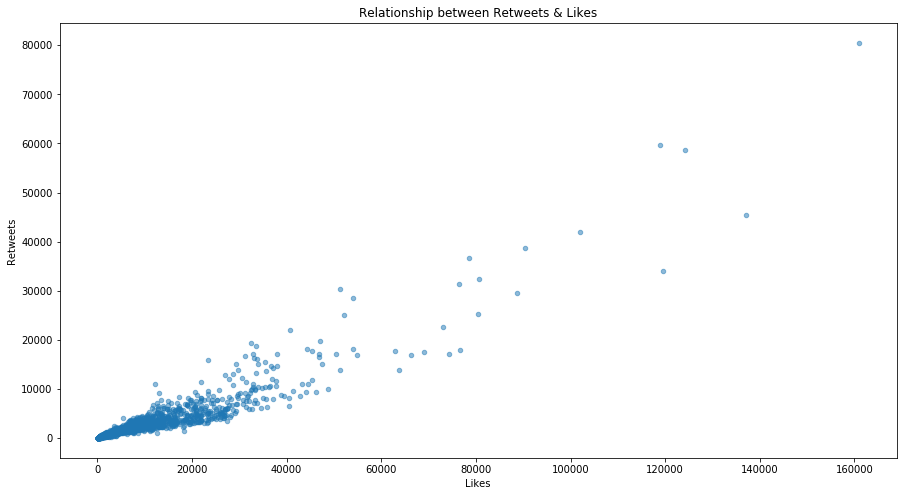

In [82]:
x = df.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', figsize = (15,8), alpha = 0.5)
x.grid(False)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Relationship between Retweets & Likes')
plt.savefig('likes&retweets.png')

Yes we can clearly see the positive corelation between likes and retweets.

##### 6.WeRateDogs tweeting trend over time.

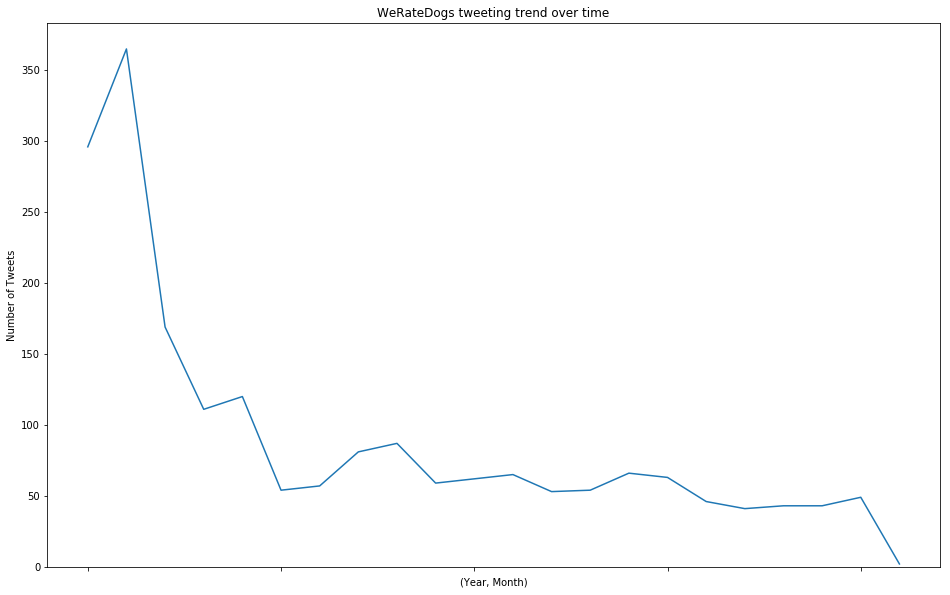

In [83]:
data = df['tweet_id'].groupby([df["year"], df["month"]]).count()
ax = data.plot('line', title='WeRateDogs tweeting trend over time', figsize = (16,10))
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend.png')